# Project Overview:
Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the 
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to 
see how that impacted the stock prices of the company and whether Time series models or any 
other predictive models can do justice to such situations. This dataset has monthly stock prices 
of the bank since its inception and includes closing, starting, highest, and lowest stock prices of 
every month. The main objective is to predict the stock’s closing price of the month. 

### Import Libraries

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [5]:
df = pd.read_csv("data_YesBank_StockPrices.csv")
df.head(10)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


### Data Cleaning

In [7]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [8]:
df.shape

(185, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [10]:
df["Date"] = pd.to_datetime(df["Date"],format="%b-%y")
df["Date"] = df["Date"].dt.strftime('%b-%y')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [12]:
df.head(15)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


In [13]:
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA) 

1) Univariate Analysis:
        Analyzing one variable at a time 

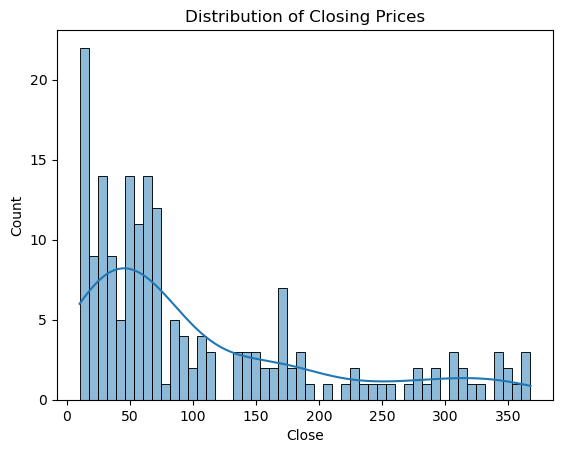

In [16]:
sns.histplot(df['Close'],bins=50,kde=True)
plt.title("Distribution of Closing Prices")
plt.show()

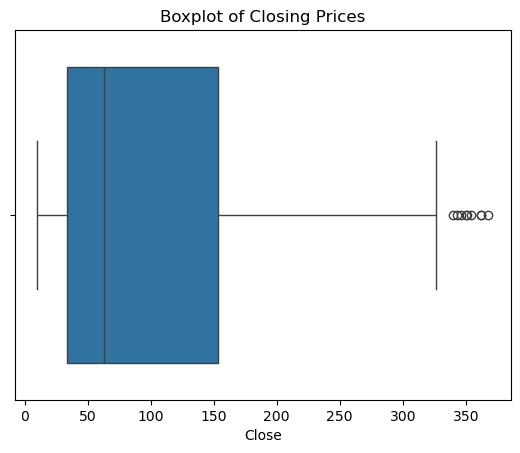

In [17]:
sns.boxplot(x=df["Close"])
plt.title("Boxplot of Closing Prices")
plt.show()

In [18]:
df.set_index('Date', inplace = True)

<Axes: xlabel='Date'>

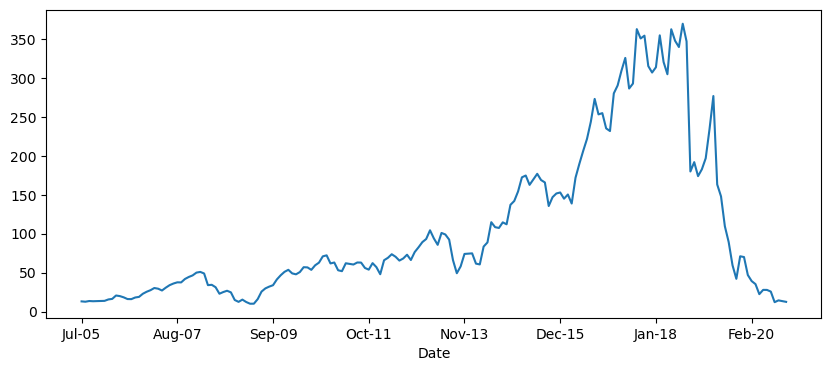

In [19]:
df["Open"].plot(figsize=(10,4))

<Axes: xlabel='Date'>

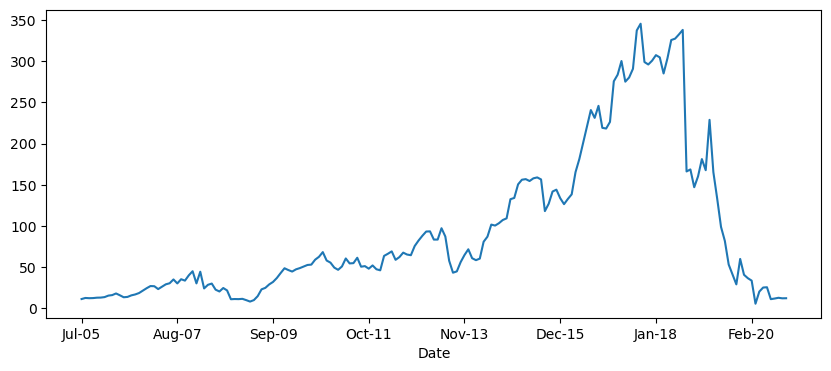

In [20]:
df["Low"].plot(figsize=(10,4))

<Axes: xlabel='Date'>

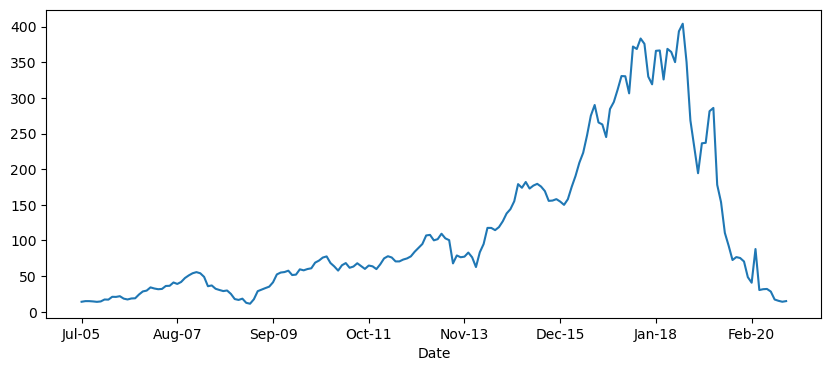

In [21]:
df["High"].plot(figsize=(10,4))

<Axes: xlabel='Date'>

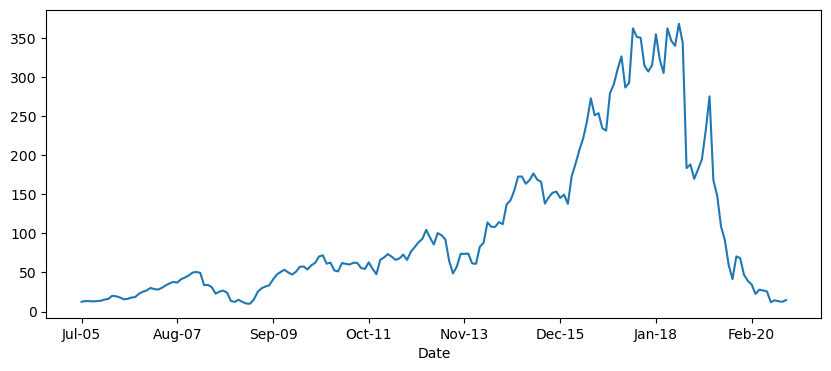

In [22]:
df["Close"].plot(figsize=(10,4))

In [23]:
df.reset_index(inplace=True)

In [24]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


2) Bivariate Analysis: Analysing 2 variables at a time

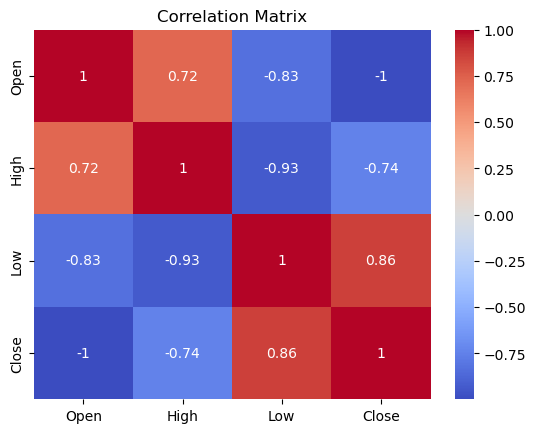

In [26]:
l1 = df[["Open","High","Low","Close"]].corr()
sns.heatmap(l1.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

3) Multivariate Analysis: Uncover Interactions among three or more variables

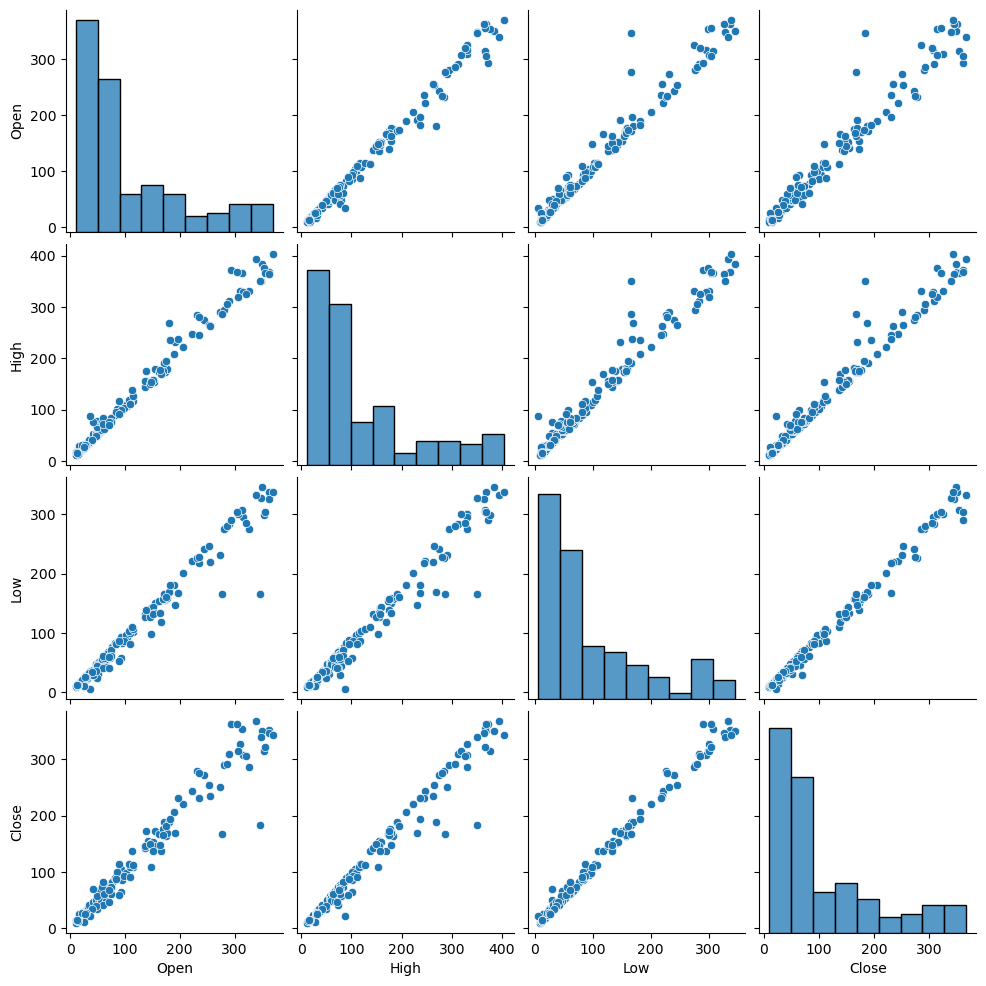

In [28]:
sns.pairplot(df[["Open","High","Low","Close"]])
plt.show()

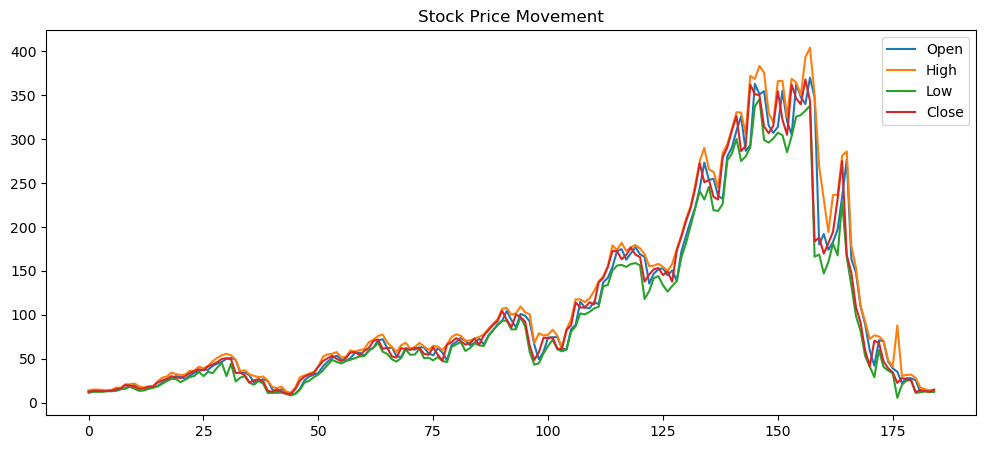

In [29]:
df[["Open","High","Low","Close"]].plot(figsize=(12,5))
plt.title("Stock Price Movement")
plt.show()

In [30]:
correlation = df[["Open","High","Low","Close"]].corr()
correlation

,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


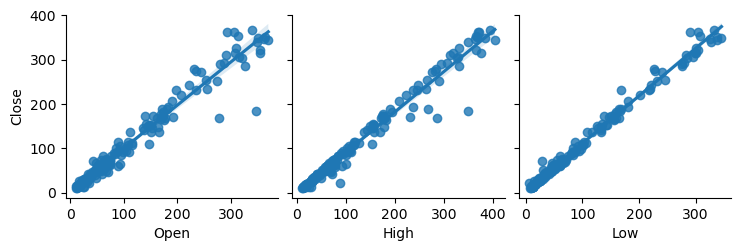

In [31]:
sns.pairplot(df,x_vars=["Open","High","Low"],y_vars="Close",kind='reg')

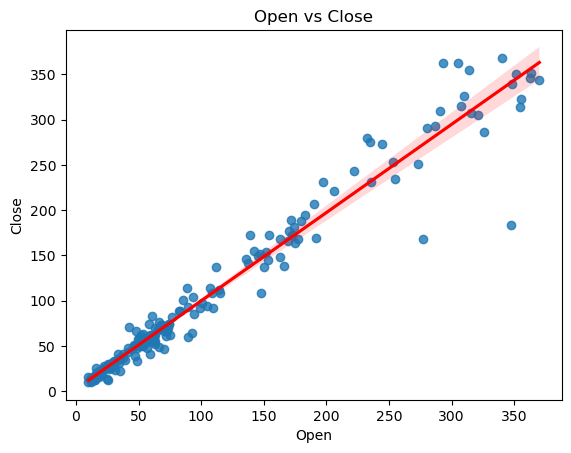

In [32]:
sns.regplot(x="Open",y="Close",data=df,line_kws={'color':'red'})
plt.title("Open vs Close")
plt.show()

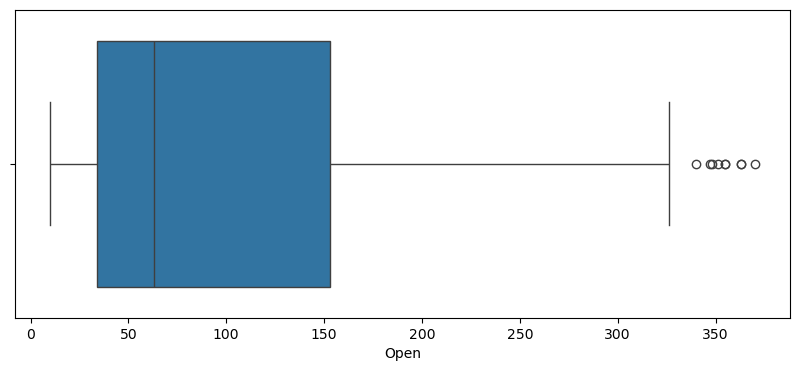

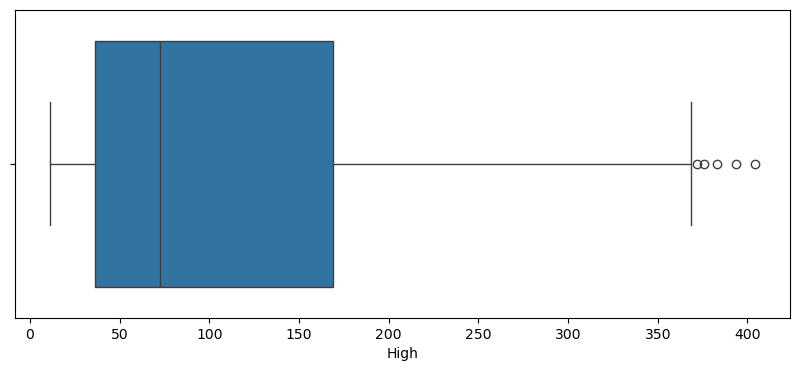

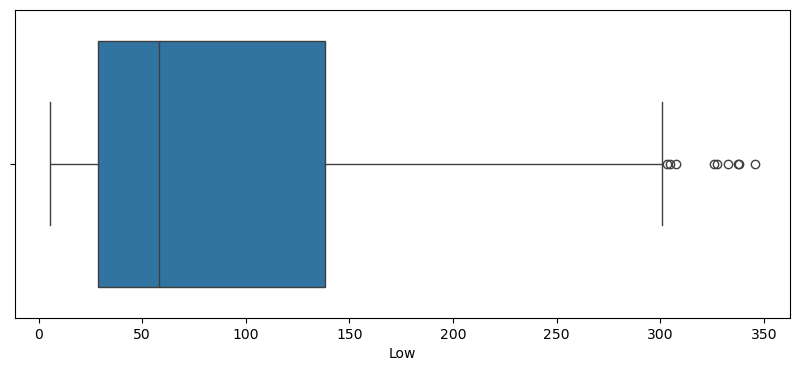

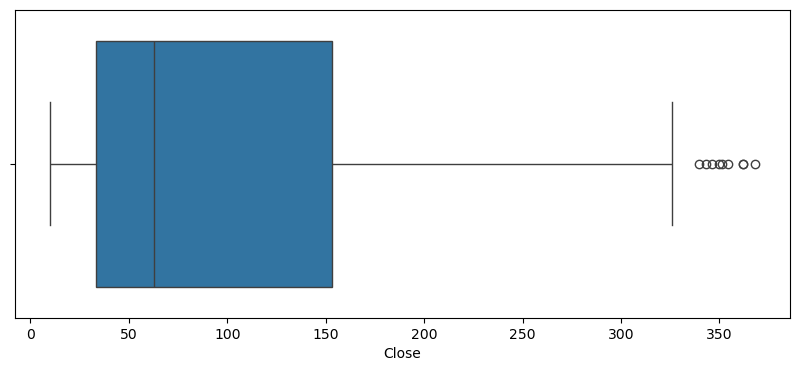

In [33]:
col = df[["Open", "High", "Low","Close"]]
for i in col:
    plt.figure(figsize = (10,4))
    sns.boxplot(x = col[i])
    plt.show()

## Model Prep

In [35]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [36]:
X = df.iloc[:,1:4]
X.head()

,Open,High,Low
0,13.00,14.00,11.25
1,12.58,14.88,12.55
2,13.48,14.87,12.27
3,13.20,14.47,12.40
4,13.35,13.88,12.88


In [37]:
y = df.iloc[:,-1]
y.head()

0    12.46
1    13.42
2    13.30
3    12.99
4    13.41
Name: Close, dtype: float64

In [38]:
dates = df["Date"]

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

## Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Predicting the Result

In [46]:
y_pred = lr.predict(X_test)
y_pred

array([ 26.72561813,  20.04473498, 166.39628126,  13.33823039,
        51.95134119,  51.75425195,  51.18509561,  56.33821919,
       322.70353822,  15.01162441,  66.33993452, 181.70335071,
        62.16444669,  25.42494188,  26.49039584,  15.35284908,
       140.50952661,  75.72665762,  29.36142993,  14.6066675 ,
       198.61884492,  68.15531895,  31.8520445 ,  44.56977288,
       142.64770081,  19.08220325,  54.28467105,  53.92879474,
       106.05127343, 134.82903569, 175.62445265,  16.25407516,
        40.0900727 ,  15.18599122,  65.27469821,  57.86879963,
       141.49280454,  10.40426629,  14.70701245,  28.00254641,
        28.72424396, 107.9047928 ,  14.16067018,  28.88438913,
        58.83775945,  20.32795722, 153.23144385,  29.92226677,
        14.82870528,  59.10671398,  62.40847008,  36.16678843,
        28.77582134,  34.25373909, 127.68707724, 249.96700158])

In [47]:
y_train

131    221.30
3       12.99
157    343.40
128    172.91
101     74.02
        ...  
61      62.22
121    137.90
42      12.24
92      85.71
91      94.50
Name: Close, Length: 129, dtype: float64

### Checking the Accuracy

In [49]:
print("Trainig Score: ",(lr.score(X_train, y_train))*100,"%")
print("Testing Score: ",(lr.score(X_test, y_test))*100,"%")

Trainig Score:  99.4722883804848 %
Testing Score:  99.50802890856771 %


### Visualise the Predicted and Actual 

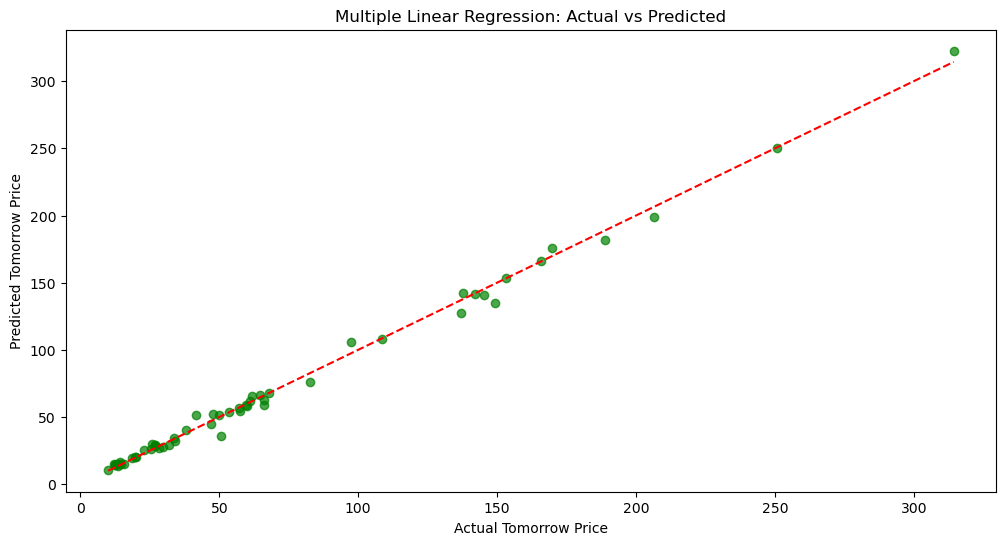

In [51]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Tomorrow Price')
plt.ylabel('Predicted Tomorrow Price')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.show()

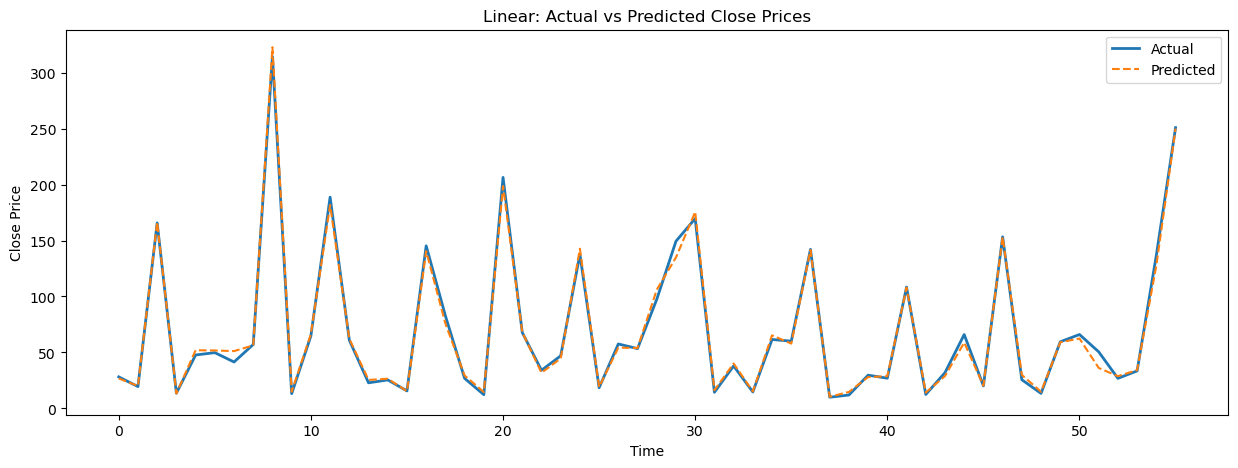

In [52]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('Linear: Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [53]:
result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
result.sample(10)

,Actual,Predicted,Difference
47,29.68,28.002546,1.677454
160,169.65,175.624453,-5.974453
94,97.49,106.051273,-8.561273
82,66.02,62.408470,3.611530
130,206.39,198.618845,7.771155
78,65.99,58.837759,7.152241
120,165.74,166.396281,-0.656281
181,14.37,16.254075,-1.884075
104,82.70,75.726658,6.973342
9,19.49,20.044735,-0.554735


### Evaluation Metrics

In [55]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("\nR2 is: ",r2)

mae = mean_absolute_error(y_test, y_pred)
print("\nMAE is: ",mae)

mse = mean_squared_error(y_test, y_pred)
print("\nMSE is: ",mse)

rmse = np.sqrt(mse)
print("\nRMSE is: ",rmse)


R2 is:  0.995080289085677

MAE is:  3.1856524962861394

MSE is:  21.406905636210897

RMSE is:  4.626759734005095


# Decision Tree Regressor

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [58]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [59]:
y_pred = dtree.predict(X_test)
y_pred

array([315.05, 362.05,  52.59, 151.82,  25.32,  15.03,  33.51,  70.3 ,
        61.21, 253.52, 176.52,  28.63,  70.3 , 315.05,  25.6 ,  66.02,
       167.96, 188.73,  12.26, 168.6 ,  50.97,  88.14,  37.93,  20.08,
        70.45,  92.2 ,  62.9 , 339.6 ,  33.51, 351.15,  33.51,  60.95,
        41.45,  94.5 , 231.2 , 253.52,  62.38,  66.02, 168.6 ,  71.86,
        15.45,  62.9 ,  37.93, 154.57, 108.38,  52.59,  61.21,  27.95,
       108.38,  33.75,  19.49, 315.05, 151.82, 314.35,  15.33,  66.02])

### Checking The Accuracy

In [61]:
print("Trainig Score: ",(dtree.score(X_train, y_train))*100,"%")
print("Testing Score: ",(dtree.score(X_test, y_test))*100,"%")

Trainig Score:  100.0 %
Testing Score:  98.89734378061777 %


### Visualisation

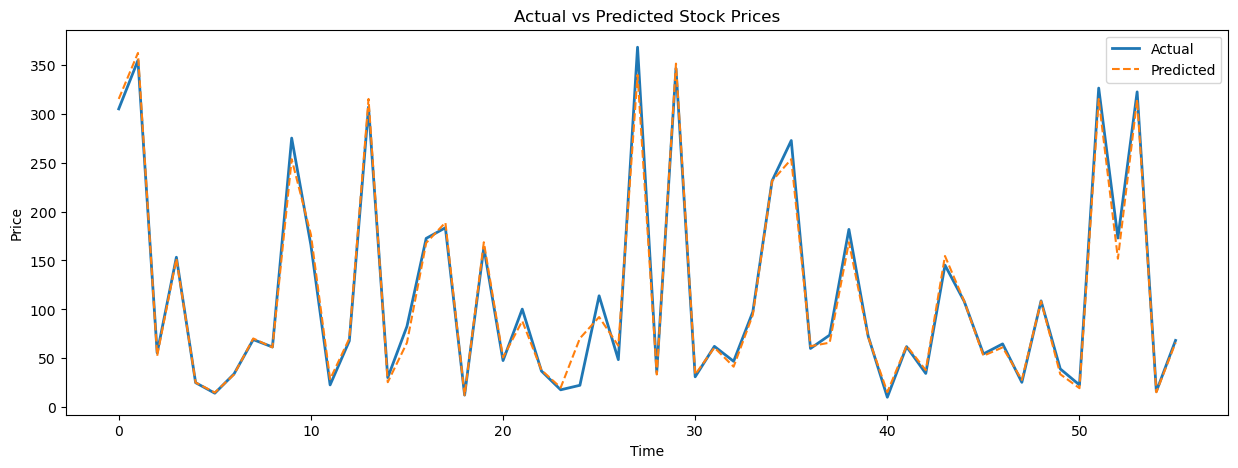

In [63]:
plt.figure(figsize=(15,5))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

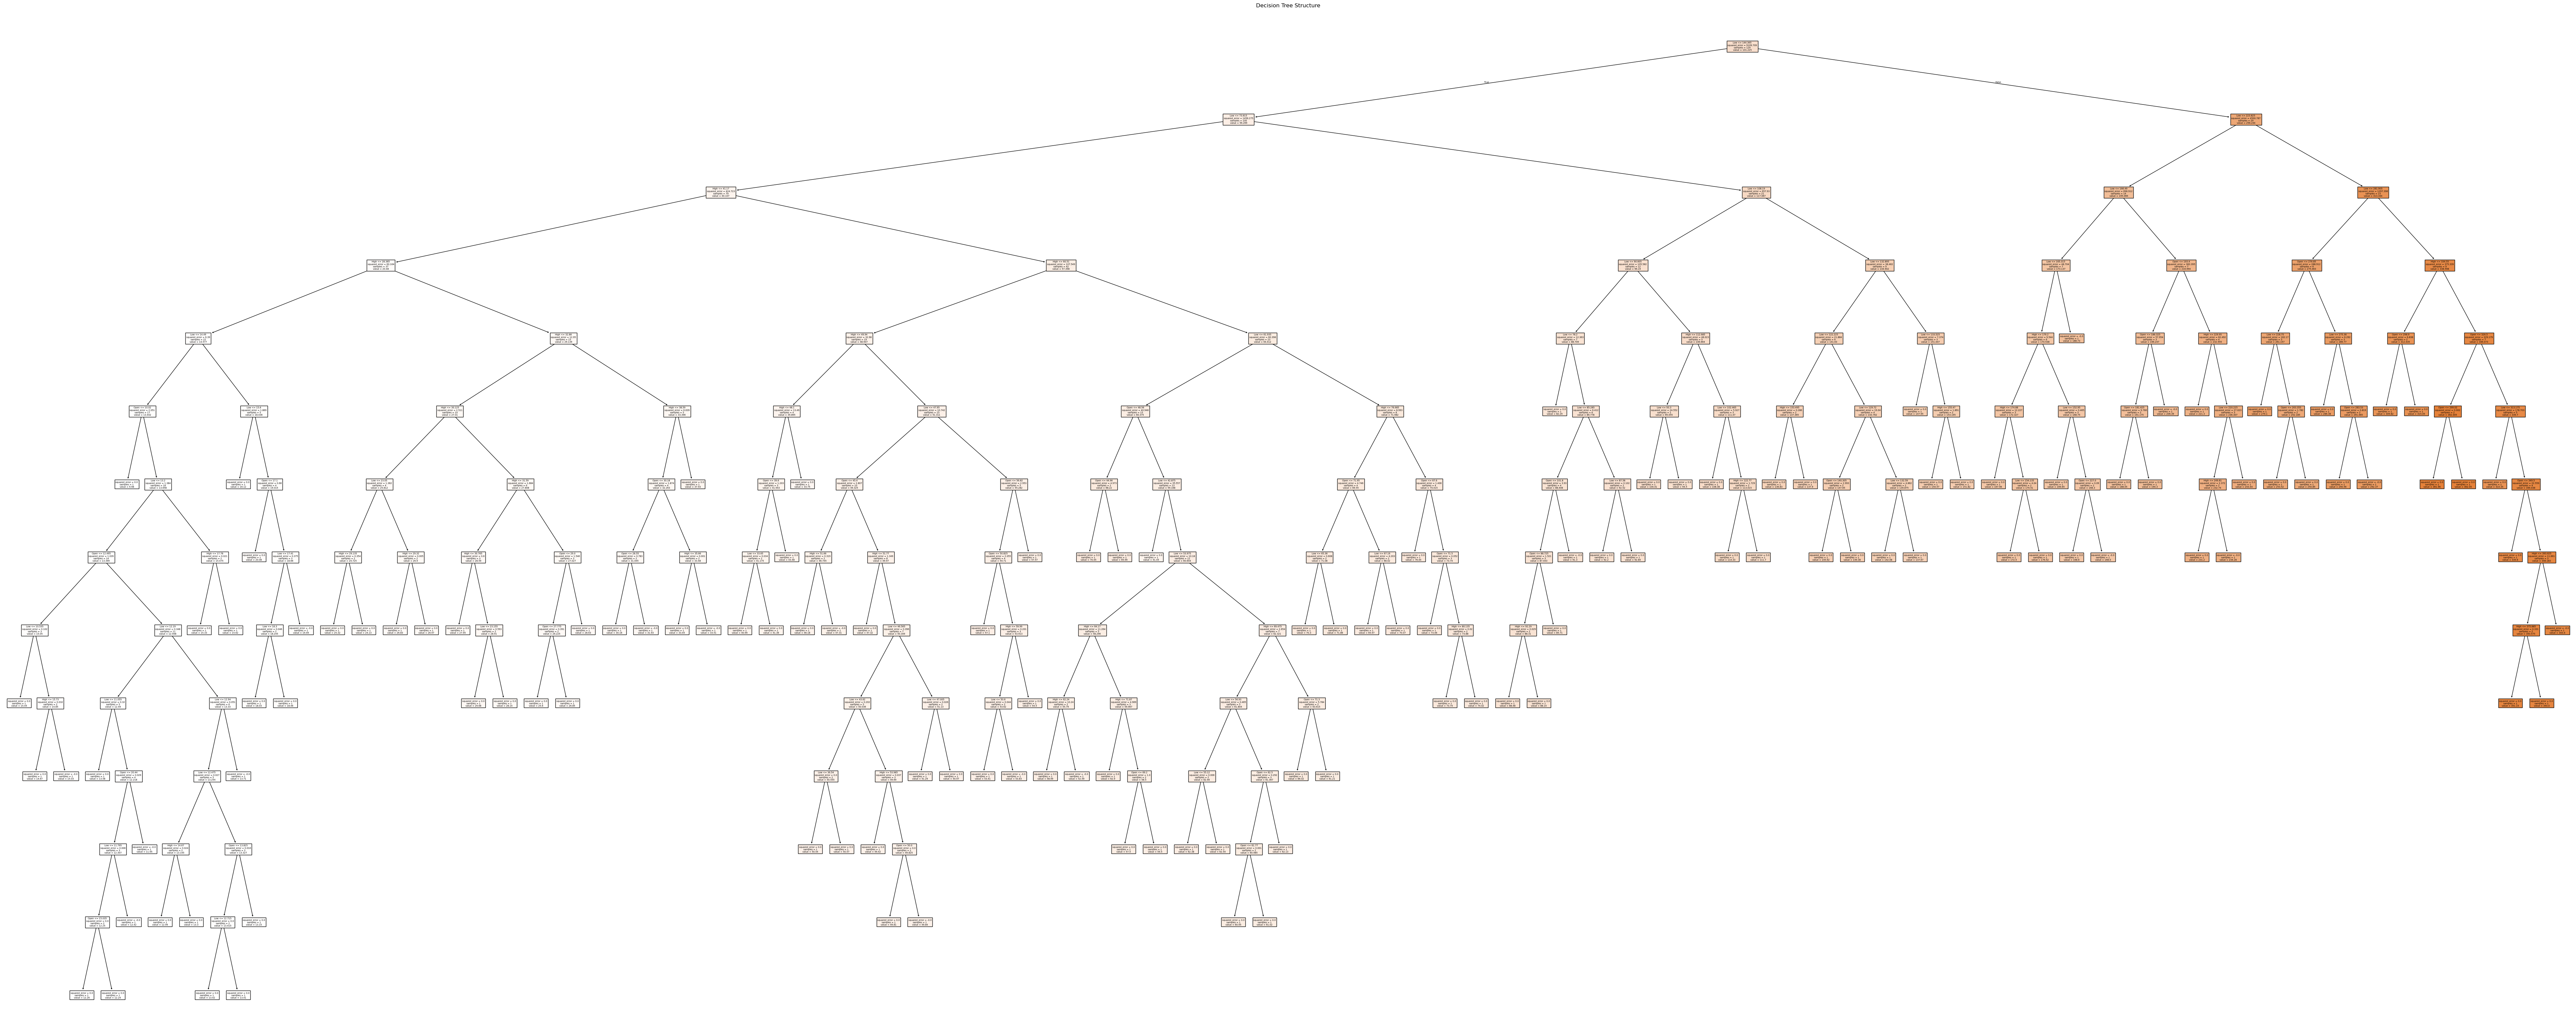

In [64]:
from sklearn.tree import plot_tree

plt.figure(figsize=(100,40))
plot_tree(dtree, filled=True, feature_names=X.columns)
plt.title('Decision Tree Structure')
plt.savefig('dtree_plot.png', format='png')
plt.show()

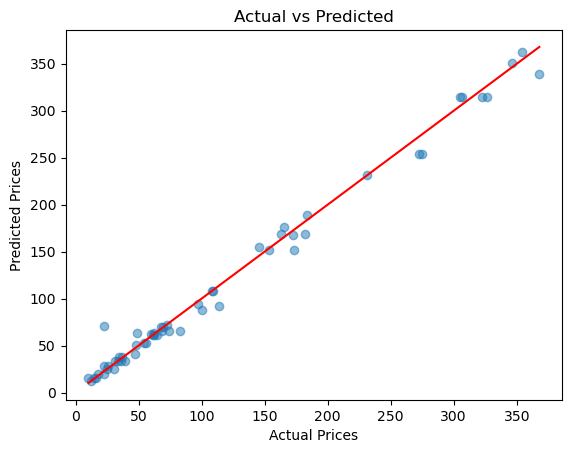

In [65]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

In [66]:
dtree_result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
dtree_result.sample(10)

,Actual,Predicted,Difference
61,62.22,60.95,1.27
173,46.95,41.45,5.50
108,108.21,108.38,-0.17
83,67.83,70.30,-2.47
174,39.20,33.75,5.45
0,12.46,12.26,0.20
167,108.70,108.38,0.32
23,35.98,33.51,2.47
156,367.90,339.60,28.30
104,82.70,66.02,16.68


### Evaluaton Metrics

In [68]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("\nR2 is: ",r2)

mae = mean_absolute_error(y_test, y_pred)
print("\nMAE is: ",mae)

mse = mean_squared_error(y_test, y_pred)
print("\nMSE is: ",mse)

rmse = np.sqrt(mse)
print("\nRMSE is: ",rmse)


R2 is:  0.9889734378061777

MAE is:  6.850357142857142

MSE is:  119.38732499999995

RMSE is:  10.926450704597533


# Random Forest Regressor

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [71]:
from sklearn.ensemble import RandomForestRegressor
ran_forest = RandomForestRegressor(n_estimators=10,random_state =0)
ran_forest.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [72]:
y_pred = ran_forest.predict(X_test)
y_pred

array([ 62.879,  18.784, 259.648, 193.675,  59.562,  14.263,  67.385,
        56.277,  26.709,  13.167, 186.188,  97.136, 148.416, 111.933,
       265.691,  70.935, 155.783,  33.565,  13.33 , 275.455,  57.916,
        27.071,  17.619,  29.147,  56.404,  46.18 ,  42.875, 120.757,
       170.819,  90.017,  13.254,  62.478,  59.84 ,  68.615,  54.933,
        29.424,  71.97 ,  35.194, 218.194,  33.767,  13.42 , 145.536,
       181.905,  71.364, 285.581, 172.494, 349.85 ,  12.38 ,  29.919,
       155.44 ,  14.567,  40.398,  26.902, 309.057,  62.204,  12.224])

### Checking the Accuracy

In [74]:
print("Trainig Score: ",(ran_forest.score(X_train, y_train))*100,"%")
print("Testing Score: ",(ran_forest.score(X_test, y_test))*100,"%")

Trainig Score:  99.81089501507357 %
Testing Score:  99.7480016274162 %


### Visualization

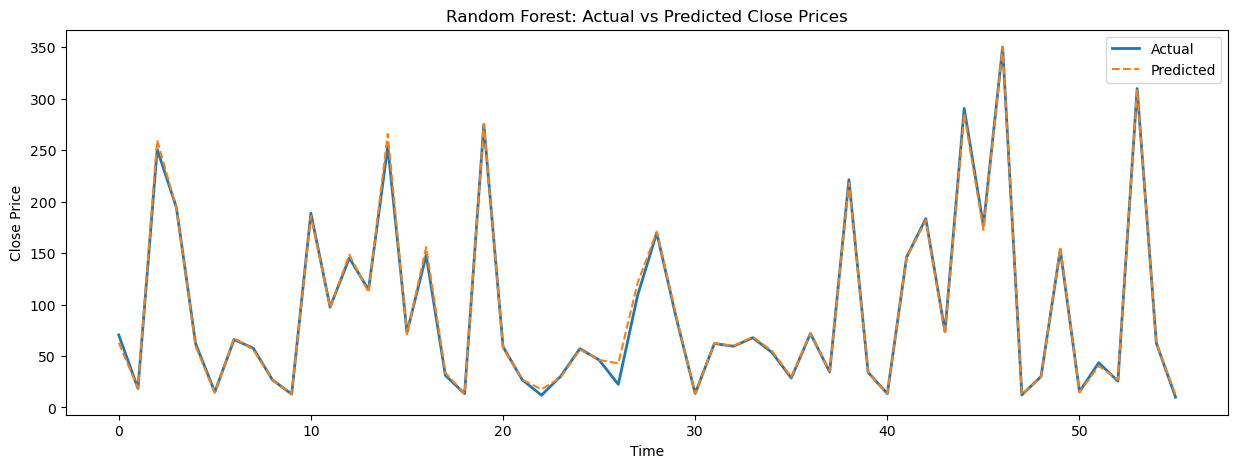

In [76]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('Random Forest: Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

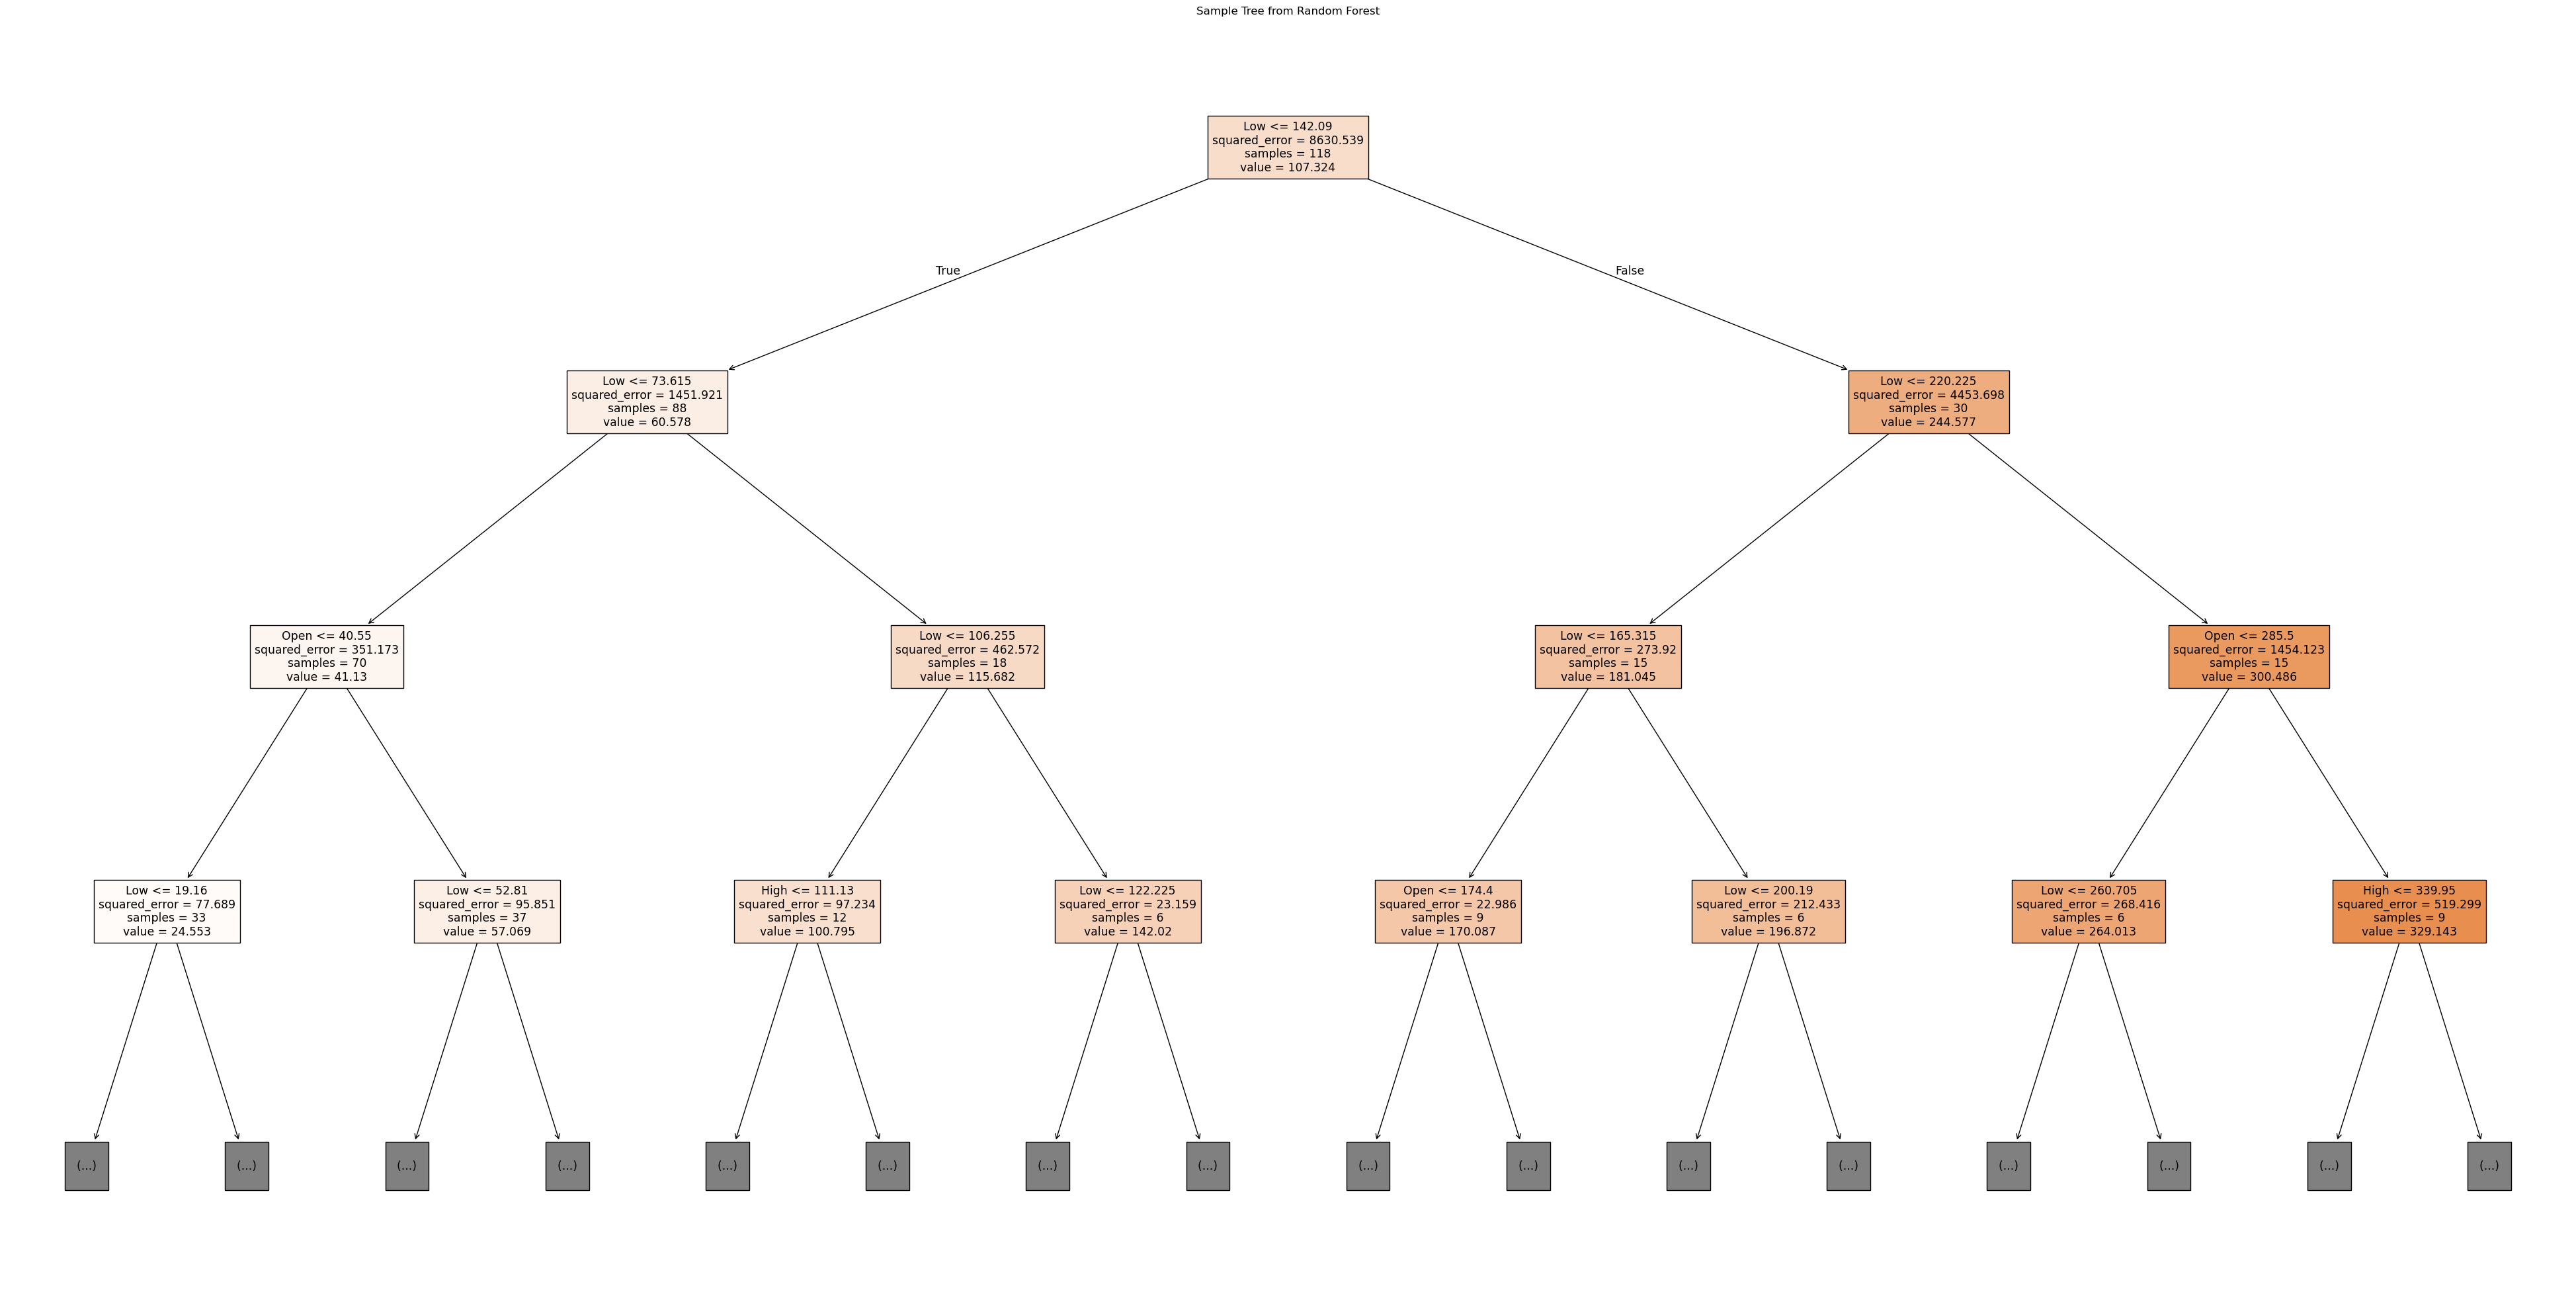

In [77]:
from sklearn.tree import plot_tree

# visualize the first tree
plt.figure(figsize=(50,25))
plot_tree(ran_forest.estimators_[0], feature_names=X.columns, filled=True, max_depth=3)
plt.title("Sample Tree from Random Forest")
plt.show()

In [78]:
rforest_result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
rforest_result.sample(10)

,Actual,Predicted,Difference
65,62.54,62.204,3.360000e-01
85,65.97,67.385,-1.415000e+00
33,34.06,33.767,2.930000e-01
1,13.42,13.420,1.776357e-15
135,253.52,265.691,-1.217100e+01
140,309.82,309.057,7.630000e-01
122,145.92,145.536,3.840000e-01
134,250.85,259.648,-8.798000e+00
28,46.18,46.180,0.000000e+00
63,71.86,71.970,-1.100000e-01


In [79]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("\nR2 is: ",r2)

mae = mean_absolute_error(y_test, y_pred)
print("\nMAE is: ",mae)

mse = mean_squared_error(y_test, y_pred)
print("\nMSE is: ",mse)

rmse = np.sqrt(mse)
print("\nRMSE is: ",rmse)


R2 is:  0.997480016274162

MAE is:  2.391749999999998

MSE is:  19.201128642857135

RMSE is:  4.381909246305443


# Support Vector Machine

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=0)

In [82]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [83]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

In [84]:
svr_model.fit(X_train, y_train)

SVR(C=100)

In [85]:
y_pred = svr_model.predict(X_test)

In [86]:
print("Trainig Score: ",(svr_model.score(X_train, y_train))*100,"%")
print("Testing Score: ",(svr_model.score(X_test, y_test))*100,"%")

Trainig Score:  99.47614285016539 %
Testing Score:  96.48412660068186 %


### Visualization

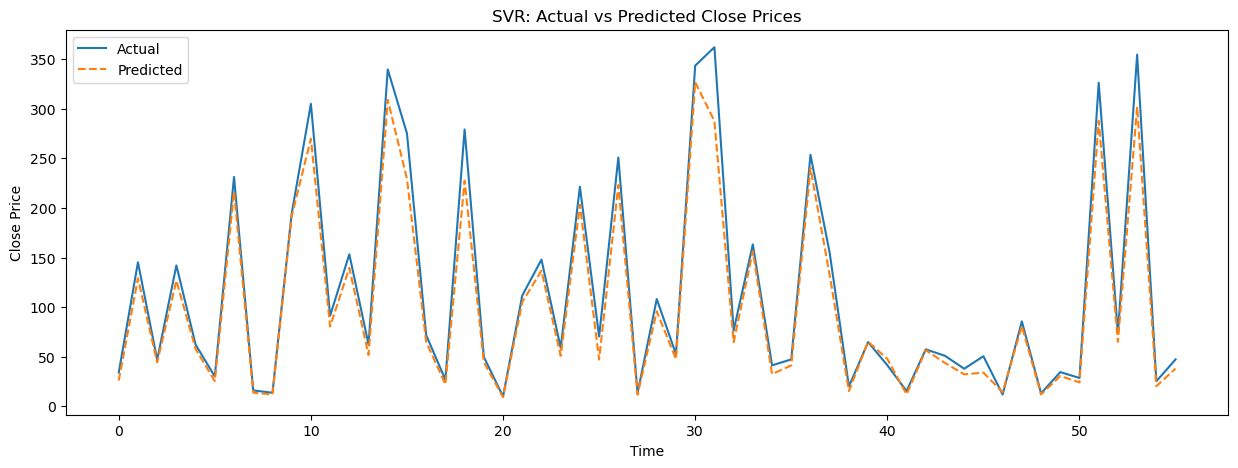

In [88]:
plt.figure(figsize=(15,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('SVR: Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

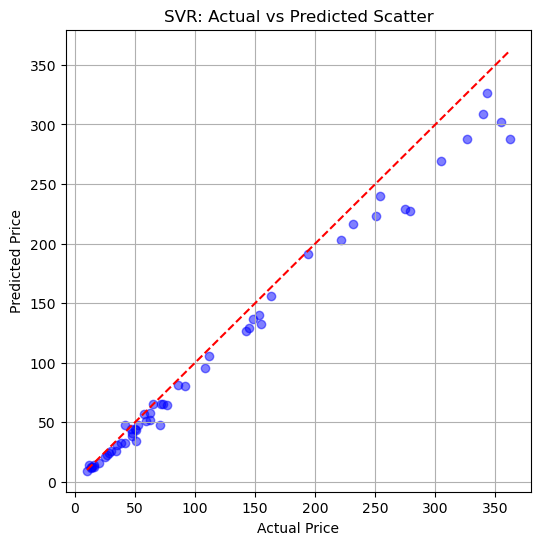

In [89]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.title('SVR: Actual vs Predicted Scatter')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

In [90]:
SVM_result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
SVM_result.sample(5)

,Actual,Predicted,Difference
80,73.46,65.073078,8.386922
56,50.97,43.763925,7.206075
157,343.40,326.752492,16.647508
26,41.36,32.558968,8.801032
152,304.90,269.757210,35.142790


### Evaluation Metrics

In [92]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("\nR2 is: ",r2)

mae = mean_absolute_error(y_test, y_pred)
print("\nMAE is: ",mae)

mse = mean_squared_error(y_test, y_pred)
print("\nMSE is: ",mse)

rmse = np.sqrt(mse)
print("\nRMSE is: ",rmse)


R2 is:  0.9648412660068186

MAE is:  13.159787877133892

MSE is:  392.86939706698973

RMSE is:  19.820933304640064


# K Nearest Neighbor 

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=0)

In [95]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [96]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [97]:
y_pred = knn_model.predict(X_test)

### Checking the Accuracy

In [99]:
print("Trainig Score: ",(knn_model.score(X_train, y_train))*100,"%")
print("Testing Score: ",(knn_model.score(X_test, y_test))*100,"%")

Trainig Score:  98.61763309917811 %
Testing Score:  97.25404521886408 %


### Visualization

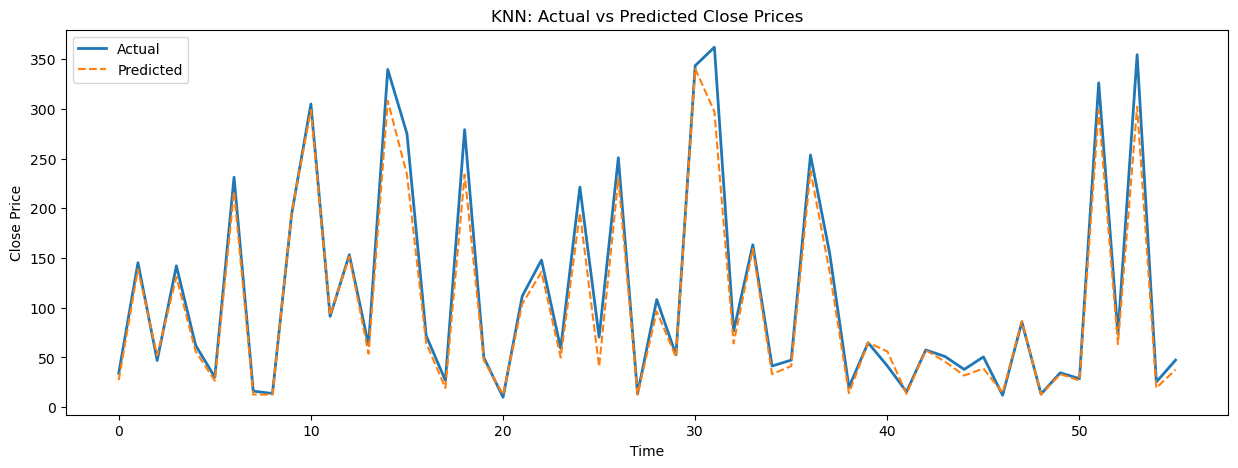

In [101]:
plt.figure(figsize=(15,5))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('KNN: Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

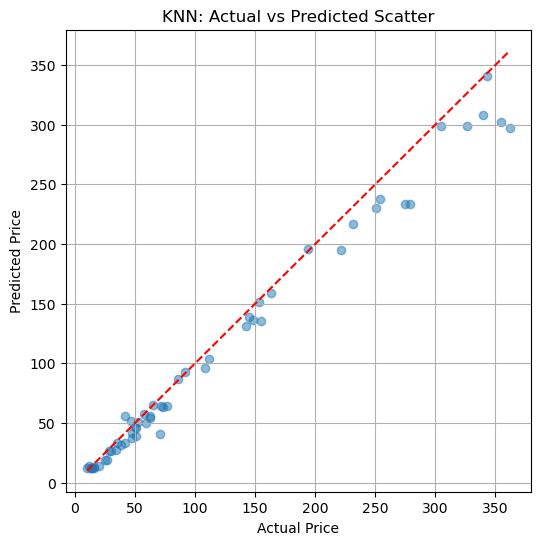

In [102]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('KNN: Actual vs Predicted Scatter')
plt.grid(True)
plt.show()

In [103]:
KNN_result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
KNN_result.sample(5)

,Actual,Predicted,Difference
155,339.60,308.060,31.540
8,20.08,14.096,5.984
24,37.93,31.770,6.160
56,50.97,45.848,5.122
168,91.30,92.388,-1.088


### Evaluation Metrics

In [105]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("\nR2 is: ",r2)

mae = mean_absolute_error(y_test, y_pred)
print("\nMAE is: ",mae)

mse = mean_squared_error(y_test, y_pred)
print("\nMSE is: ",mse)

rmse = np.sqrt(mse)
print("\nRMSE is: ",rmse)


R2 is:  0.9725404521886408

MAE is:  11.197928571428571

MSE is:  306.8374417142857

RMSE is:  17.51677600799547


# Cross Validation for All Models

In [107]:
from sklearn.model_selection import cross_val_score

print("\nLinear Regression:")
print("Training cross validation score: ",round(((cross_val_score(lr, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(lr, X_test, y_test)).mean())*100,2))

print("\nDecision Tree Regressor: ")
print("Training cross validation score: ",round(((cross_val_score(dtree, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(dtree, X_test, y_test)).mean())*100,2))

print("\nRandom Forest Regressor: ")
print("Training cross validation score: ",round(((cross_val_score(ran_forest, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(ran_forest, X_test, y_test)).mean())*100,2))

print("\nSupport Vector Machine: ")
print("Training cross validation score: ",round(((cross_val_score(svr_model, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(svr_model, X_test, y_test)).mean())*100,2))

print("\nK Nearest Neighbor: ")
print("Training cross validation score: ",round(((cross_val_score(knn_model, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(knn_model, X_test, y_test)).mean())*100,2))


Linear Regression:
Training cross validation score:  99.24
Testing cross validation score:  99.16

Decision Tree Regressor: 
Training cross validation score:  98.33
Testing cross validation score:  97.9

Random Forest Regressor: 
Training cross validation score:  98.04
Testing cross validation score:  98.08

Support Vector Machine: 
Training cross validation score:  98.97
Testing cross validation score:  98.62

K Nearest Neighbor: 
Training cross validation score:  97.09
Testing cross validation score:  97.81
